In [46]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from casatasks import (
    flagmanager,
    flagdata,
    mstransform,
    listobs,
    setjy,
    gaincal,
    bandpass,
    fluxscale,
    applycal,
    tclean,
    rmtables,
    impbcor,
    split,
    uvmodelfit,
    exportfits,
)
import os
from casacore.tables import table
import cmasher as cmr
# Source/run information
save_dir = "/data/ATCA/analysis/"
data_dir = "/data/ATCA/ATCA_datareduction/"
target = "J020507"
epoch = "2021-10-15"
band = "C"


In [9]:
# TIMES FOR J020507 SECONDARY 


start_str = "16:59:30"
end_str = "17:01:00"

start_time = datetime.datetime.strptime(start_str, "%H:%M:%S") 
end_time = datetime.datetime.strptime(end_str, "%H:%M:%S") 
new_time = start_time
current_time = start_time
timeranges = []
timeranges.append(start_str)
while new_time < end_time: 
    new_time = (new_time + datetime.timedelta(0,30))
    current_time = new_time.time()
    current_str = new_time.strftime("%H:%M:%S")
    timeranges.append(current_str)
print(timeranges)


start_str = "17:12:10"
end_str = "17:13:40"

start_time = datetime.datetime.strptime(start_str, "%H:%M:%S") 
end_time = datetime.datetime.strptime(end_str, "%H:%M:%S") 
new_time = start_time
current_time = start_time
timeranges.append(start_str)
while new_time < end_time: 
    new_time = (new_time + datetime.timedelta(0,30))
    current_time = new_time.time()
    current_str = new_time.strftime("%H:%M:%S")
    timeranges.append(current_str)
print(timeranges)


start_str = "18:43:50"
end_str = "18:45:20"

start_time = datetime.datetime.strptime(start_str, "%H:%M:%S") 
end_time = datetime.datetime.strptime(end_str, "%H:%M:%S") 
new_time = start_time
current_time = start_time
timeranges.append(start_str)
while new_time < end_time: 
    new_time = (new_time + datetime.timedelta(0,30))
    current_time = new_time.time()
    current_str = new_time.strftime("%H:%M:%S")
    timeranges.append(current_str)
print(timeranges)

start_str = "18:56:30"
end_str = "18:58:00"

start_time = datetime.datetime.strptime(start_str, "%H:%M:%S") 
end_time = datetime.datetime.strptime(end_str, "%H:%M:%S") 
new_time = start_time
current_time = start_time
timeranges.append(start_str)
while new_time < end_time: 
    new_time = (new_time + datetime.timedelta(0,30))
    current_time = new_time.time()
    current_str = new_time.strftime("%H:%M:%S")
    timeranges.append(current_str)
print(timeranges)

plt_dates_020507_sec = []

for i in range(len(timeranges)):
    plt_dates_020507_sec.append(datetime.datetime.strptime(f"{epoch} {timeranges[i]}", "%Y-%m-%d %H:%M:%S"))

['16:59:30', '17:00:00', '17:00:30', '17:01:00']
['16:59:30', '17:00:00', '17:00:30', '17:01:00', '17:12:10', '17:12:40', '17:13:10', '17:13:40']
['16:59:30', '17:00:00', '17:00:30', '17:01:00', '17:12:10', '17:12:40', '17:13:10', '17:13:40', '18:43:50', '18:44:20', '18:44:50', '18:45:20']
['16:59:30', '17:00:00', '17:00:30', '17:01:00', '17:12:10', '17:12:40', '17:13:10', '17:13:40', '18:43:50', '18:44:20', '18:44:50', '18:45:20', '18:56:30', '18:57:00', '18:57:30', '18:58:00']


In [18]:
# TIMES FOR J020507

start_str = "17:01:50"
end_str = "17:11:20"

start_time = datetime.datetime.strptime(start_str, "%H:%M:%S") 
end_time = datetime.datetime.strptime(end_str, "%H:%M:%S") 
new_time = start_time
current_time = start_time
timeranges = []
timeranges.append(start_str)
while new_time < end_time: 
    new_time = (new_time + datetime.timedelta(0,30))
    current_time = new_time.time()
    current_str = new_time.strftime("%H:%M:%S")
    timeranges.append(current_str)
print(timeranges)


start_str = "18:46:10"
end_str = "18:55:40"

start_time = datetime.datetime.strptime(start_str, "%H:%M:%S") 
end_time = datetime.datetime.strptime(end_str, "%H:%M:%S") 
new_time = start_time
current_time = start_time
timeranges.append(start_str)
while new_time < end_time: 
    new_time = (new_time + datetime.timedelta(0,30))
    current_time = new_time.time()
    current_str = new_time.strftime("%H:%M:%S")
    timeranges.append(current_str)
print(timeranges)

plt_dates_020507 = []

for i in range(len(timeranges)):
    plt_dates_020507.append(datetime.datetime.strptime(f"{epoch} {timeranges[i]}", "%Y-%m-%d %H:%M:%S"))

['17:01:50', '17:02:20', '17:02:50', '17:03:20', '17:03:50', '17:04:20', '17:04:50', '17:05:20', '17:05:50', '17:06:20', '17:06:50', '17:07:20', '17:07:50', '17:08:20', '17:08:50', '17:09:20', '17:09:50', '17:10:20', '17:10:50', '17:11:20']
['17:01:50', '17:02:20', '17:02:50', '17:03:20', '17:03:50', '17:04:20', '17:04:50', '17:05:20', '17:05:50', '17:06:20', '17:06:50', '17:07:20', '17:07:50', '17:08:20', '17:08:50', '17:09:20', '17:09:50', '17:10:20', '17:10:50', '17:11:20', '18:46:10', '18:46:40', '18:47:10', '18:47:40', '18:48:10', '18:48:40', '18:49:10', '18:49:40', '18:50:10', '18:50:40', '18:51:10', '18:51:40', '18:52:10', '18:52:40', '18:53:10', '18:53:40', '18:54:10', '18:54:40', '18:55:10', '18:55:40']


In [22]:
# TIMES FOR J033023

start_str = "16:45:40"
end_str = "16:55:10"

start_time = datetime.datetime.strptime(start_str, "%H:%M:%S") 
end_time = datetime.datetime.strptime(end_str, "%H:%M:%S") 
new_time = start_time
current_time = start_time
timeranges = []
timeranges.append(start_str)
while new_time < end_time: 
    new_time = (new_time + datetime.timedelta(0,30))
    current_time = new_time.time()
    current_str = new_time.strftime("%H:%M:%S")
    timeranges.append(current_str)
print(timeranges)

start_str = "18:30:20"
end_str = "18:39:50"

start_time = datetime.datetime.strptime(start_str, "%H:%M:%S") 
end_time = datetime.datetime.strptime(end_str, "%H:%M:%S") 
new_time = start_time
current_time = start_time
timeranges.append(start_str)
while new_time < end_time: 
    new_time = (new_time + datetime.timedelta(0,30))
    current_time = new_time.time()
    current_str = new_time.strftime("%H:%M:%S")
    timeranges.append(current_str)
    
    
    
start_str = "20:05:50"
end_str = "20:15:20"

start_time = datetime.datetime.strptime(start_str, "%H:%M:%S") 
end_time = datetime.datetime.strptime(end_str, "%H:%M:%S") 
new_time = start_time
current_time = start_time
timeranges.append(start_str)
while new_time < end_time: 
    new_time = (new_time + datetime.timedelta(0,30))
    current_time = new_time.time()
    current_str = new_time.strftime("%H:%M:%S")
    timeranges.append(current_str)
print(timeranges)



start_str = "20:40:40"
end_str = "20:50:10"

start_time = datetime.datetime.strptime(start_str, "%H:%M:%S") 
end_time = datetime.datetime.strptime(end_str, "%H:%M:%S") 
new_time = start_time
current_time = start_time
timeranges.append(start_str)
while new_time < end_time: 
    new_time = (new_time + datetime.timedelta(0,30))
    current_time = new_time.time()
    current_str = new_time.strftime("%H:%M:%S")
    timeranges.append(current_str)
    
plt_dates_033023 = []

for i in range(len(timeranges)):
    plt_dates_033023.append(datetime.datetime.strptime(f"{epoch} {timeranges[i]}", "%Y-%m-%d %H:%M:%S"))

['16:45:40', '16:46:10', '16:46:40', '16:47:10', '16:47:40', '16:48:10', '16:48:40', '16:49:10', '16:49:40', '16:50:10', '16:50:40', '16:51:10', '16:51:40', '16:52:10', '16:52:40', '16:53:10', '16:53:40', '16:54:10', '16:54:40', '16:55:10']
['16:45:40', '16:46:10', '16:46:40', '16:47:10', '16:47:40', '16:48:10', '16:48:40', '16:49:10', '16:49:40', '16:50:10', '16:50:40', '16:51:10', '16:51:40', '16:52:10', '16:52:40', '16:53:10', '16:53:40', '16:54:10', '16:54:40', '16:55:10', '18:30:20', '18:30:50', '18:31:20', '18:31:50', '18:32:20', '18:32:50', '18:33:20', '18:33:50', '18:34:20', '18:34:50', '18:35:20', '18:35:50', '18:36:20', '18:36:50', '18:37:20', '18:37:50', '18:38:20', '18:38:50', '18:39:20', '18:39:50', '20:05:50', '20:06:20', '20:06:50', '20:07:20', '20:07:50', '20:08:20', '20:08:50', '20:09:20', '20:09:50', '20:10:20', '20:10:50', '20:11:20', '20:11:50', '20:12:20', '20:12:50', '20:13:20', '20:13:50', '20:14:20', '20:14:50', '20:15:20']


In [35]:
# TIMES FOR J033023 L BAND 

start_str = "16:28:00"
end_str = "16:37:20"

start_time = datetime.datetime.strptime(start_str, "%H:%M:%S") 
end_time = datetime.datetime.strptime(end_str, "%H:%M:%S") 
new_time = start_time
current_time = start_time
timeranges = []
timeranges.append(start_str)
while new_time < end_time: 
    new_time = (new_time + datetime.timedelta(0,30))
    current_time = new_time.time()
    current_str = new_time.strftime("%H:%M:%S")
    timeranges.append(current_str)
print(timeranges)

start_str = "18:12:30"
end_str = "18:22:00"

start_time = datetime.datetime.strptime(start_str, "%H:%M:%S") 
end_time = datetime.datetime.strptime(end_str, "%H:%M:%S") 
new_time = start_time
current_time = start_time
timeranges.append(start_str)
while new_time < end_time: 
    new_time = (new_time + datetime.timedelta(0,30))
    current_time = new_time.time()
    current_str = new_time.strftime("%H:%M:%S")
    timeranges.append(current_str)
    
    
    
start_str = "19:48:10"
end_str = "19:57:40"

start_time = datetime.datetime.strptime(start_str, "%H:%M:%S") 
end_time = datetime.datetime.strptime(end_str, "%H:%M:%S") 
new_time = start_time
current_time = start_time
timeranges.append(start_str)
while new_time < end_time: 
    new_time = (new_time + datetime.timedelta(0,30))
    current_time = new_time.time()
    current_str = new_time.strftime("%H:%M:%S")
    timeranges.append(current_str)
print(timeranges)



start_str = "20:23:10"
end_str = "20:32:40"

start_time = datetime.datetime.strptime(start_str, "%H:%M:%S") 
end_time = datetime.datetime.strptime(end_str, "%H:%M:%S") 
new_time = start_time
current_time = start_time
timeranges.append(start_str)
while new_time < end_time: 
    new_time = (new_time + datetime.timedelta(0,30))
    current_time = new_time.time()
    current_str = new_time.strftime("%H:%M:%S")
    timeranges.append(current_str)
    
    

start_str = "20:58:00"
end_str = "21:07:30"

start_time = datetime.datetime.strptime(start_str, "%H:%M:%S") 
end_time = datetime.datetime.strptime(end_str, "%H:%M:%S") 
new_time = start_time
current_time = start_time
timeranges.append(start_str)
while new_time < end_time: 
    new_time = (new_time + datetime.timedelta(0,30))
    current_time = new_time.time()
    current_str = new_time.strftime("%H:%M:%S")
    timeranges.append(current_str)
    
plt_dates_033023_L = []

for i in range(len(timeranges)):
    plt_dates_033023_L.append(datetime.datetime.strptime(f"{epoch} {timeranges[i]}", "%Y-%m-%d %H:%M:%S"))

['16:28:00', '16:28:30', '16:29:00', '16:29:30', '16:30:00', '16:30:30', '16:31:00', '16:31:30', '16:32:00', '16:32:30', '16:33:00', '16:33:30', '16:34:00', '16:34:30', '16:35:00', '16:35:30', '16:36:00', '16:36:30', '16:37:00', '16:37:30']
['16:28:00', '16:28:30', '16:29:00', '16:29:30', '16:30:00', '16:30:30', '16:31:00', '16:31:30', '16:32:00', '16:32:30', '16:33:00', '16:33:30', '16:34:00', '16:34:30', '16:35:00', '16:35:30', '16:36:00', '16:36:30', '16:37:00', '16:37:30', '18:12:30', '18:13:00', '18:13:30', '18:14:00', '18:14:30', '18:15:00', '18:15:30', '18:16:00', '18:16:30', '18:17:00', '18:17:30', '18:18:00', '18:18:30', '18:19:00', '18:19:30', '18:20:00', '18:20:30', '18:21:00', '18:21:30', '18:22:00', '19:48:10', '19:48:40', '19:49:10', '19:49:40', '19:50:10', '19:50:40', '19:51:10', '19:51:40', '19:52:10', '19:52:40', '19:53:10', '19:53:40', '19:54:10', '19:54:40', '19:55:10', '19:55:40', '19:56:10', '19:56:40', '19:57:10', '19:57:40']


In [41]:
if (os.path.exists(f"{data_dir}data/{epoch}_{band}_{target}_selfcaltime.ms"))is False: 
    mstransform(
        vis=f"{data_dir}data/{epoch}_{band}_{target}_selfcal.ms",
        outputvis=f"{data_dir}data/{epoch}_{band}_{target}_selfcaltime.ms",
        datacolumn="corrected",
        nspw=1,
        regridms=True,
        field=target,
        combinespws=True
    )
tar_ms = f"{data_dir}data/{epoch}_{band}_{target}_selfcaltime.ms"

fluxes = []

outfile = f"{data_dir}/J020507/casa_files/{target}_{band}_{epoch}.cl"
if (os.path.exists(outfile))is False: 
    uvmodelfit(
        vis=tar_ms,
        niter=10,
        comptype='P',
        outfile=outfile,
        field="0",
        selectdata=True,
        timerange="",
    )
    tbl = table(outfile)
    flux = tbl.getcell("Flux", 0)[0].astype("float64")
    
else:
    tbl = table(outfile)
    flux = tbl.getcell("Flux", 0)[0].astype("float64")
    
# print(j020507)
    
for i in range(len(timeranges)):
    timerange = f"{timeranges[i]}+00:00:30"
    outfile = f"{data_dir}/J020507/casa_files/{target}_{band}_{epoch}_{timerange}.cl"
    if (os.path.exists(outfile))is False: 
        uvmodelfit(
            vis=tar_ms,
            niter=10,
            comptype='P',
    #         spw="0",
    #         sourcepar=[0.3, 2.6, 0.7],
            outfile=outfile,
            field="0",
            selectdata=True,
            timerange=timerange,
        )
        tbl = table(outfile)
        flux = tbl.getcell("Flux", 0)[0].astype("float64")
        fluxes.append(flux)
    else:
        tbl = table(outfile)
        flux = tbl.getcell("Flux", 0)[0].astype("float64")
        fluxes.append(flux)


Successful readonly open of default-locked table /data/ATCA/ATCA_datareduction//J020507/casa_files/J033023_L_2021-10-15.cl: 20 columns, 1 rows


/home/katross/.local/lib/python3.6/site-packages/ipykernel_launcher.py:27: ComplexWarning: Casting complex values to real discards the imaginary part


Successful readonly open of default-locked table /data/ATCA/ATCA_datareduction//J020507/casa_files/J033023_L_2021-10-15_16:28:00+00:00:30.cl: 20 columns, 1 rows


/home/katross/.local/lib/python3.6/site-packages/ipykernel_launcher.py:51: ComplexWarning: Casting complex values to real discards the imaginary part


Successful readonly open of default-locked table /data/ATCA/ATCA_datareduction//J020507/casa_files/J033023_L_2021-10-15_16:28:30+00:00:30.cl: 20 columns, 1 rows
Successful readonly open of default-locked table /data/ATCA/ATCA_datareduction//J020507/casa_files/J033023_L_2021-10-15_16:29:00+00:00:30.cl: 20 columns, 1 rows
Successful readonly open of default-locked table /data/ATCA/ATCA_datareduction//J020507/casa_files/J033023_L_2021-10-15_16:29:30+00:00:30.cl: 20 columns, 1 rows
Successful readonly open of default-locked table /data/ATCA/ATCA_datareduction//J020507/casa_files/J033023_L_2021-10-15_16:30:00+00:00:30.cl: 20 columns, 1 rows
Successful readonly open of default-locked table /data/ATCA/ATCA_datareduction//J020507/casa_files/J033023_L_2021-10-15_16:30:30+00:00:30.cl: 20 columns, 1 rows
Successful readonly open of default-locked table /data/ATCA/ATCA_datareduction//J020507/casa_files/J033023_L_2021-10-15_16:31:00+00:00:30.cl: 20 columns, 1 rows
Successful readonly open of defaul

Successful readonly open of default-locked table /data/ATCA/ATCA_datareduction//J020507/casa_files/J033023_L_2021-10-15_19:54:10+00:00:30.cl: 20 columns, 1 rows
Successful readonly open of default-locked table /data/ATCA/ATCA_datareduction//J020507/casa_files/J033023_L_2021-10-15_19:54:40+00:00:30.cl: 20 columns, 1 rows
Successful readonly open of default-locked table /data/ATCA/ATCA_datareduction//J020507/casa_files/J033023_L_2021-10-15_19:55:10+00:00:30.cl: 20 columns, 1 rows
Successful readonly open of default-locked table /data/ATCA/ATCA_datareduction//J020507/casa_files/J033023_L_2021-10-15_19:55:40+00:00:30.cl: 20 columns, 1 rows
Successful readonly open of default-locked table /data/ATCA/ATCA_datareduction//J020507/casa_files/J033023_L_2021-10-15_19:56:10+00:00:30.cl: 20 columns, 1 rows
Successful readonly open of default-locked table /data/ATCA/ATCA_datareduction//J020507/casa_files/J033023_L_2021-10-15_19:56:40+00:00:30.cl: 20 columns, 1 rows
Successful readonly open of defaul

In [5]:
j020507_c_fluxes = fluxes 
j020507_c = flux 

In [20]:
j020507_x_fluxes = fluxes 
j020507_x = flux 

In [11]:
j020507_sec_c_fluxes = fluxes 
j020507_sec_c = flux 

In [15]:
j020507_sec_x_fluxes = fluxes 
j020507_sec_x = flux 

In [27]:
j033023_x_fluxes = fluxes
j033023_x = flux 

In [31]:
j033023_c_fluxes = fluxes
j033023_c = flux

In [42]:
j033023_l_fluxes = fluxes
j033023_l = flux

No handles with labels found to put in legend.
No handles with labels found to put in legend.


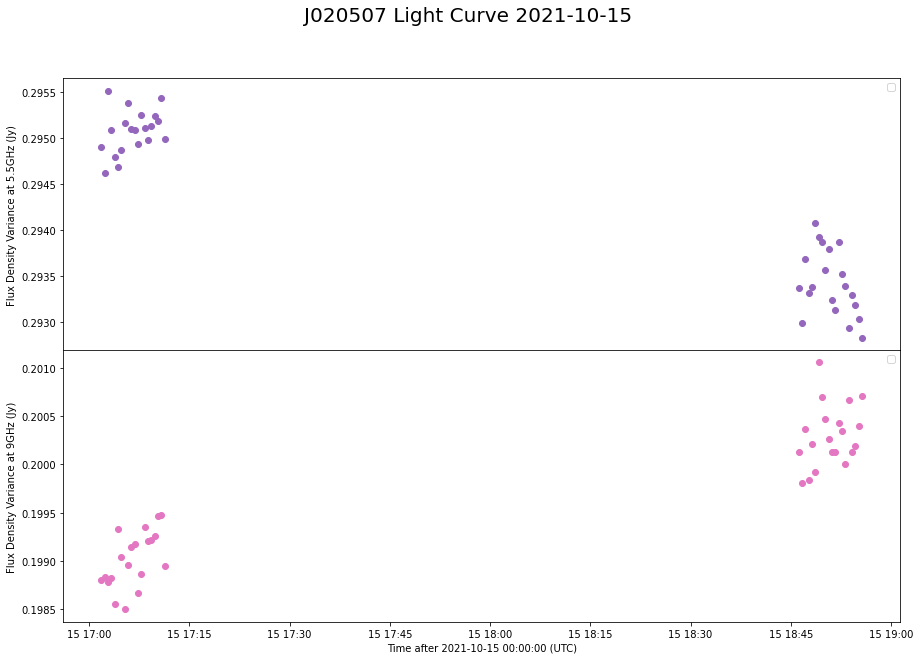

In [55]:
fig = plt.figure(1, figsize=(15,10),facecolor='white')
gs = fig.add_gridspec(2,hspace=0)
axes = gs.subplots(sharex=True)
fig.suptitle("J020507 Light Curve 2021-10-15", fontsize=20)
# axes[0].plot_date(plt_dates_020507_sec, (j020507_sec_c_fluxes-j020507_sec_c), label="Sec")
# axes[1].plot_date(plt_dates_020507_sec, (j020507_sec_x_fluxes-j020507_sec_x), label="Sec")
axes[0].plot_date(plt_dates_020507, j020507_c_fluxes,color="C4")#-j020507_c), label="J020507")
axes[1].plot_date(plt_dates_020507, j020507_x_fluxes,color='C6')#-j020507_x),label="J020507")
axes[0].legend()
axes[1].legend()
axes[0].set_ylabel("Flux Density Variance at 5.5GHz (Jy)")
axes[1].set_ylabel("Flux Density Variance at 9GHz (Jy)")
axes[1].set_xlabel("Time after 2021-10-15 00:00:00 (UTC)")
plt.savefig("/data/ATCA/analysis/J020507_sec_2021-10-15-lightcurve.png",facecolor=fig.get_facecolor(),transparent=False)
# plt.plot_date(plt_dates, j020507_fluxes_C)
# plt.title("J020507 C band Oct21")

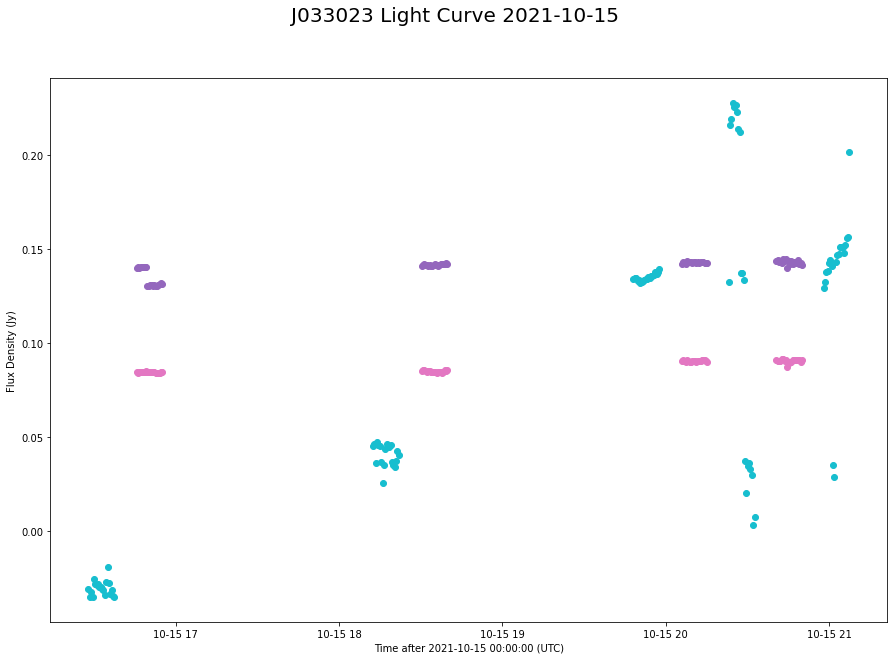

In [61]:
fig = plt.figure(1, figsize=(15,10),facecolor='white')
gs = plt.GridSpec(1,1)
axes = plt.subplot(gs[0])
fig.suptitle("J033023 Light Curve 2021-10-15", fontsize=20)
# axes[0].plot_date(plt_dates_020507_sec, (j020507_sec_c_fluxes-j020507_sec_c), label="Sec")
# axes[1].plot_date(plt_dates_020507_sec, (j020507_sec_x_fluxes-j020507_sec_x), label="Sec")
axes.plot_date(plt_dates_033023, j033023_c_fluxes, label="5GHz",color="C4")
axes.plot_date(plt_dates_033023, j033023_x_fluxes,label="9GHz",color="C6")
axes.plot_date(plt_dates_033023_L, j033023_l_fluxes,label="2GHz",color="C9")
# axes[0].legend()
# axes[1].legend()
axes.set_ylabel("Flux Density (Jy)")
# axes[0].set_ylabel("Flux Density at 9GHz (Jy)")
# axes[0].set_ylabel("Flux Density at 2GHz (Jy)")
axes.set_xlabel("Time after 2021-10-15 00:00:00 (UTC)")
plt.savefig("/data/ATCA/analysis/J033023_sec_2021-10-15-lightcurve.png",facecolor=fig.get_facecolor(),transparent=False)
# plt.plot_date(plt_dates, j020507_fluxes_C)
# plt.title("J020507 C band Oct21")